In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csc_array

In [123]:
# our first mesh
coords = np.array([[0,0],[1,0],[1,1],[0,1]])
elems = np.array([[0,2,1],[2,0,3]])

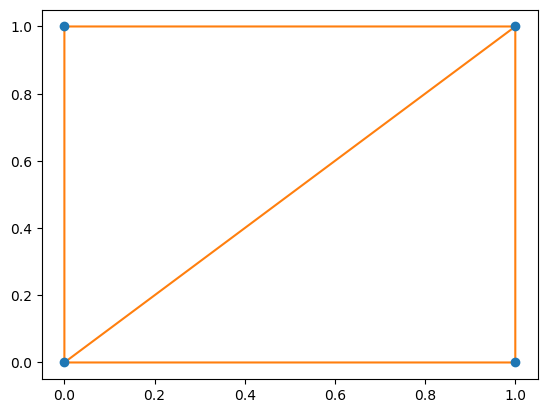

In [124]:
# plot mesh
plt.plot(coords[:,0],coords[:,1],'o')
plt.triplot(coords[:,0],coords[:,1],elems)

In [125]:
# extract the sides
def computeSides(coords,elems):
    sides = np.vstack([elems[:,[0,1]],elems[:,[1,2]],elems[:,[0,2]]])
    sides = np.sort(sides,axis=1)
    sides = np.unique(sides,axis=0)
    return sides

# refine the mesh
def refineMesh(coords, elems):
    sides = computeSides(coords,elems)
    coords4mids = 0.5*coords[sides[:,0],:] + 0.5*coords[sides[:,1],:]
    side4vtx = csc_array((np.arange(coords.shape[0],coords.shape[0]+sides.shape[0]),(sides[:,0],sides[:,1])),shape=(coords.shape[0],coords.shape[0]))
    side4vtx = side4vtx + side4vtx.T
    coords = np.vstack([coords,coords4mids])
    print(coords)
    p0 = elems[0,0]
    p1 = elems[0,1]
    p2 = elems[0,2]
    p3 = side4vtx[p1,p2]
    p4 = side4vtx[p0,p2]
    p5 = side4vtx[p0,p1]
    newelems = np.array([[p0,p4,p5],[p5,p1,p3],[p4,p5,p3],[p4,p3,p2]])
    return coords, newelems
    

In [126]:
coords, newelems = refineMesh(coords,elems)
print(newelems)

[[0.  0. ]
 [1.  0. ]
 [1.  1. ]
 [0.  1. ]
 [0.5 0. ]
 [0.5 0.5]
 [0.  0.5]
 [1.  0.5]
 [0.5 1. ]]
[[0 4 5]
 [5 2 7]
 [4 5 7]
 [4 7 1]]


In [127]:
A = csr_array([[1, 2, 0], [0, 0, 3], [4, 0, 5]])

In [128]:
print(A)


<Compressed Sparse Row sparse array of dtype 'int32'
	with 5 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1
  (0, 1)	2
  (1, 2)	3
  (2, 0)	4
  (2, 2)	5
